# View Bonavista Bay Buoy Data

In [1]:
import numpy as np
import xarray as xr
import gsw
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
from netCDF4 import date2num

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
from erddapy import ERDDAP

# Create an ERDDAP object and specify the server URL and dataset ID
e = ERDDAP(server='https://www.smartatlantic.ca/erddap')
dataset_id = 'SMA_bonavista'

# Set the variables you want to retrieve
variables = [
    'precise_lon',
    'precise_lat',
    'wind_spd_avg',
    'wind_spd_max',
    'wind_dir_avg',
    'air_temp_avg',
    'air_pressure_avg',
    'air_humidity_avg',
    'air_dewpoint_avg',
    'surface_temp_avg',
    'wave_ht_max',
    'wave_ht_sig',
    'wave_period_max',
    'wave_dir_avg',
    'wave_spread_avg',
    'curr_spd_avg',
    'curr_dir_avg'
]

# Set the subset for the desired region and time
constraints = {
    'time>=': '2017-06-01T00:00:00Z',
    'time<=': '2017-09-01T00:00:00Z',
}

# Retrieve the data using the 'get_download_url' method
url = e.get_download_url(
    dataset_id=dataset_id,
    protocol='tabledap',
    variables=variables,
    response='csv',
    constraints=constraints
)

In [11]:
import requests
import pandas as pd
import xarray as xr
import io

# Get the raw CSV data from the server
r = requests.get(url)

# Split the CSV data into lines
lines = r.text.splitlines()

# Find the index of the line that contains the original column names
header_index = 0
for i, line in enumerate(lines):
    if 'precise_lon' in line:  # assuming 'precise_lon' is part of the header
        header_index = i
        break

# Assign column names
column_names = lines[header_index].split(',')

# Skip the units line and use original column names
data_str = '\n'.join([','.join(column_names)] + lines[header_index + 2:])

data = pd.read_csv(io.StringIO(data_str))

# Convert the pandas DataFrame to an xarray DataFrame
xdf = xr.Dataset.from_dataframe(data)

print(xdf)


<xarray.Dataset>
Dimensions:           (index: 3179)
Coordinates:
  * index             (index) int64 0 1 2 3 4 5 ... 3174 3175 3176 3177 3178
Data variables: (12/17)
    precise_lon       (index) float64 nan nan nan nan ... -53.03 -53.03 -53.03
    precise_lat       (index) float64 nan nan nan nan ... 48.69 48.69 48.69
    wind_spd_avg      (index) float64 8.1 8.5 5.6 6.2 5.2 ... 7.3 7.8 7.9 7.8
    wind_spd_max      (index) float64 9.5 9.7 6.8 7.2 6.3 ... 9.3 9.6 9.5 9.6
    wind_dir_avg      (index) float64 169.0 178.0 178.0 ... 108.0 99.0 87.0
    air_temp_avg      (index) float64 8.0 8.3 9.9 12.2 ... 12.3 12.3 12.4 12.3
    ...                ...
    wave_ht_sig       (index) float64 0.6 0.7 0.6 0.6 0.5 ... 1.6 1.6 1.4 1.4
    wave_period_max   (index) float64 8.0 7.7 9.5 7.4 8.7 ... 8.7 8.7 8.3 8.3
    wave_dir_avg      (index) float64 132.0 126.0 113.0 ... 105.0 101.0 103.0
    wave_spread_avg   (index) float64 42.0 40.0 45.0 45.0 ... 39.0 41.0 41.0
    curr_spd_avg      (index)

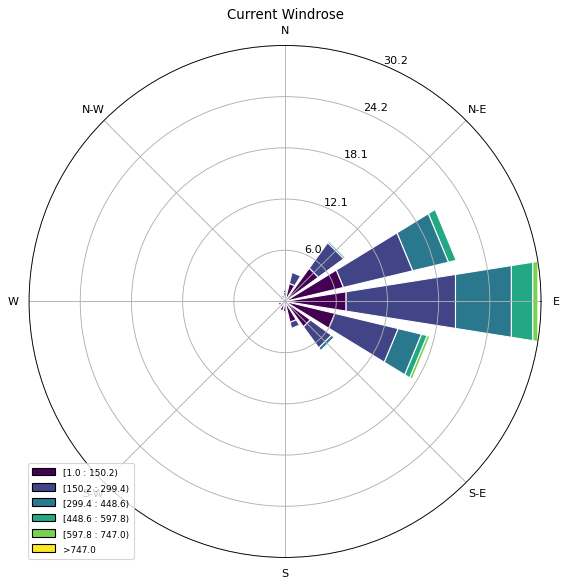

In [15]:
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import numpy as np

# Extract the current magnitude and direction data from the xarray Dataset
current_magnitude = np.array(data['curr_spd_avg'], dtype=float)
current_direction = np.array(data['curr_dir_avg'], dtype=float)

# Remove NaN values
mask = ~np.isnan(current_magnitude) & ~np.isnan(current_direction)
current_magnitude = current_magnitude[mask]
current_direction = current_direction[mask]

# Create a windrose plot
ax = WindroseAxes.from_ax()
ax.bar(current_direction, current_magnitude, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

# Set plot title
ax.set_title('Current Windrose')

# Show the windrose plot
plt.show()
